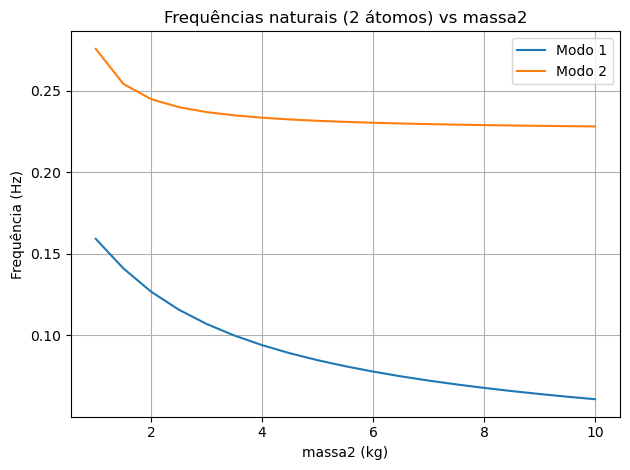

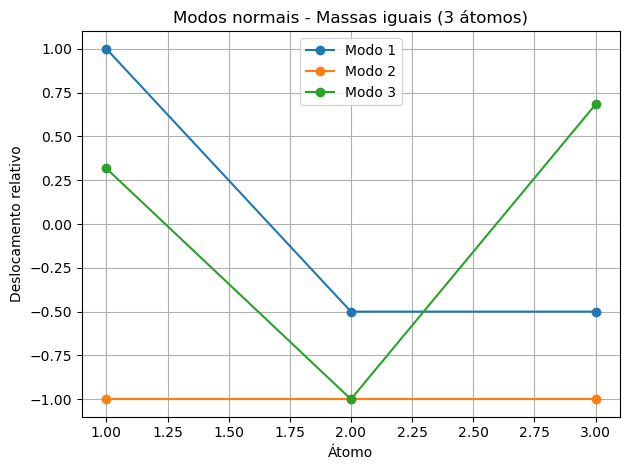

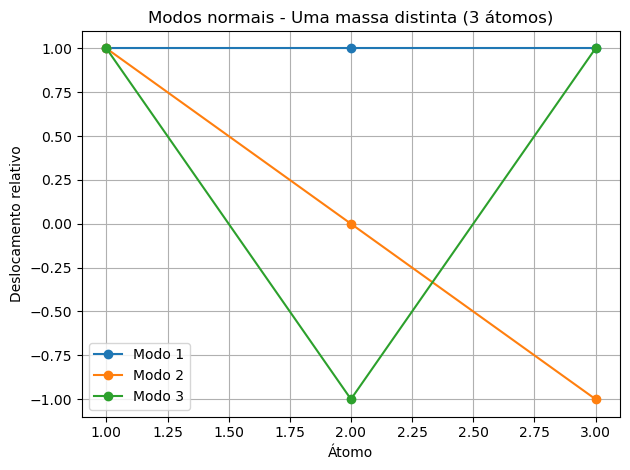

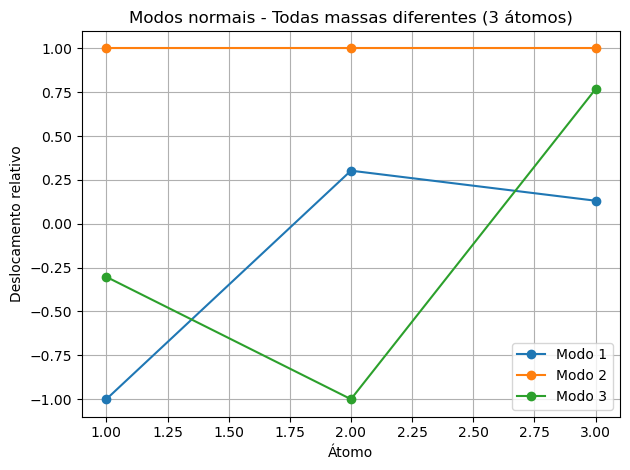

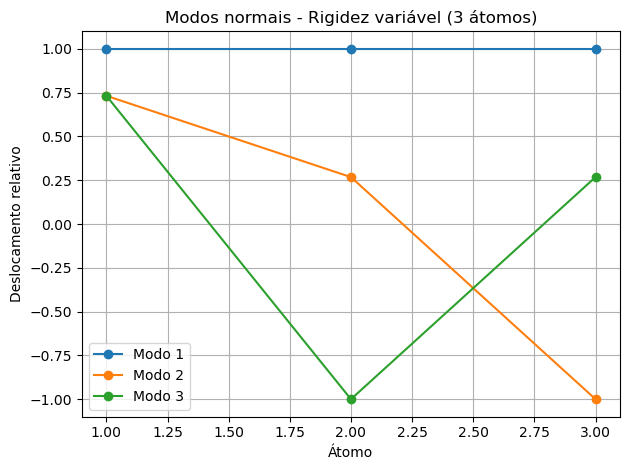

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def resolver_cadeia_periodica(massas, rigidezes):
    n = len(massas)
    M = np.diag(massas)
    K = np.zeros((n, n))

    for i in range(n):
        K[i, i] = rigidezes[i] + rigidezes[i - 1]
        K[i, (i + 1) % n] = -rigidezes[i]
        K[(i + 1) % n, i] = -rigidezes[i]

    A = np.linalg.inv(M) @ K
    autovalores, autovetores = np.linalg.eig(A)
    omega = np.sqrt(np.abs(autovalores))
    frequencias_hz = omega / (2 * np.pi)

    for i in range(autovetores.shape[1]):
        autovetores[:, i] /= np.max(np.abs(autovetores[:, i]))

    return np.sort(frequencias_hz), autovetores

# Parte 1: 2 átomos
massa1 = 1.0
rigidez = 1.0
massa2_valores = np.arange(1, 10.5, 0.5)
frequencias_m2 = []

for massa2 in massa2_valores:
    massas_2 = [massa1, massa2]
    rigidezes_2 = [rigidez, rigidez]
    frequencias, _ = resolver_cadeia_periodica(massas_2, rigidezes_2)
    frequencias_m2.append(frequencias)

frequencias_m2 = np.array(frequencias_m2)

# Gráfico Frequências x massa2
plt.figure()
for i in range(frequencias_m2.shape[1]):
    plt.plot(massa2_valores, frequencias_m2[:, i], label=f"Modo {i+1}")
plt.title("Frequências naturais (2 átomos) vs massa2")
plt.xlabel("massa2 (kg)")
plt.ylabel("Frequência (Hz)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Parte 2: 3 átomos

# Caso a: Todas massas iguais
massas_iguais = [1.0, 1.0, 1.0]
rigidezes_iguais = [1.0, 1.0, 1.0]
frequencias_iguais, modos_iguais = resolver_cadeia_periodica(massas_iguais, rigidezes_iguais)

# Caso b: Uma massa distinta
massas_uma_diferente = [1.0, 2.0, 1.0]
frequencias_uma, modos_uma = resolver_cadeia_periodica(massas_uma_diferente, rigidezes_iguais)

# Caso c: Todas massas diferentes
massas_diferentes = [1.0, 2.0, 3.0]
frequencias_diferentes, modos_diferentes = resolver_cadeia_periodica(massas_diferentes, rigidezes_iguais)

# Caso d: Rigidez variável com massas iguais
rigidez_variavel = [1.0, 2.0, 3.0]
frequencias_kvar, modos_kvar = resolver_cadeia_periodica(massas_iguais, rigidez_variavel)

# Função para plotar modos normais
def plotar_modos(modos, titulo, massas):
    plt.figure()
    for i in range(modos.shape[1]):
        plt.plot(range(1, len(massas)+1), modos[:, i], marker='o', label=f"Modo {i+1}")
    plt.title(titulo)
    plt.xlabel("Átomo")
    plt.ylabel("Deslocamento relativo")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotagens dos modos normais
plotar_modos(modos_iguais, "Modos normais - Massas iguais (3 átomos)", massas_iguais)
plotar_modos(modos_uma, "Modos normais - Uma massa distinta (3 átomos)", massas_uma_diferente)
plotar_modos(modos_diferentes, "Modos normais - Todas massas diferentes (3 átomos)", massas_diferentes)
plotar_modos(modos_kvar, "Modos normais - Rigidez variável (3 átomos)", massas_iguais)
